In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
df_ethereum=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Ethereum.csv")
print(df_ethereum.head())

   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07  


In [5]:
df_ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [6]:
df_ethereum.shape

(2160, 10)

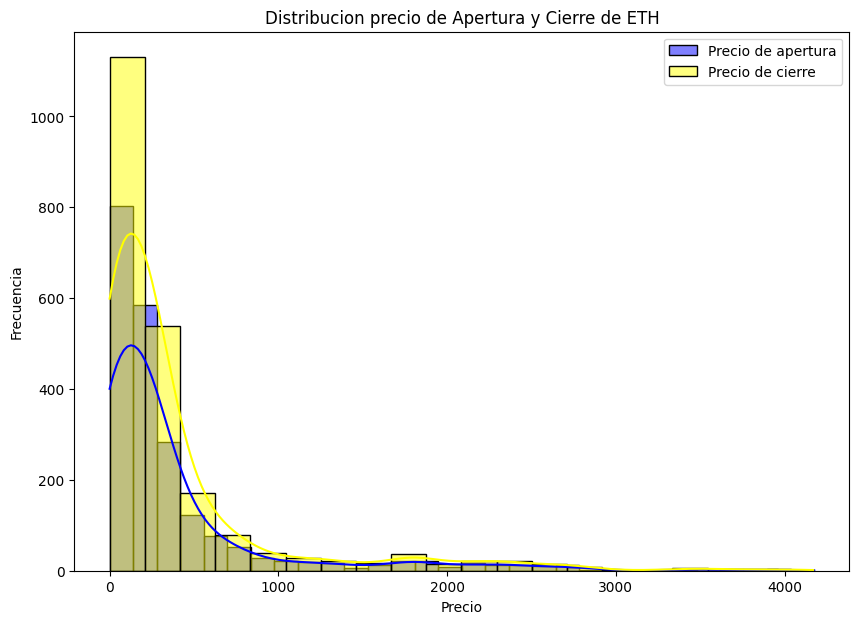

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(df_ethereum['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_ethereum['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de ETH')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

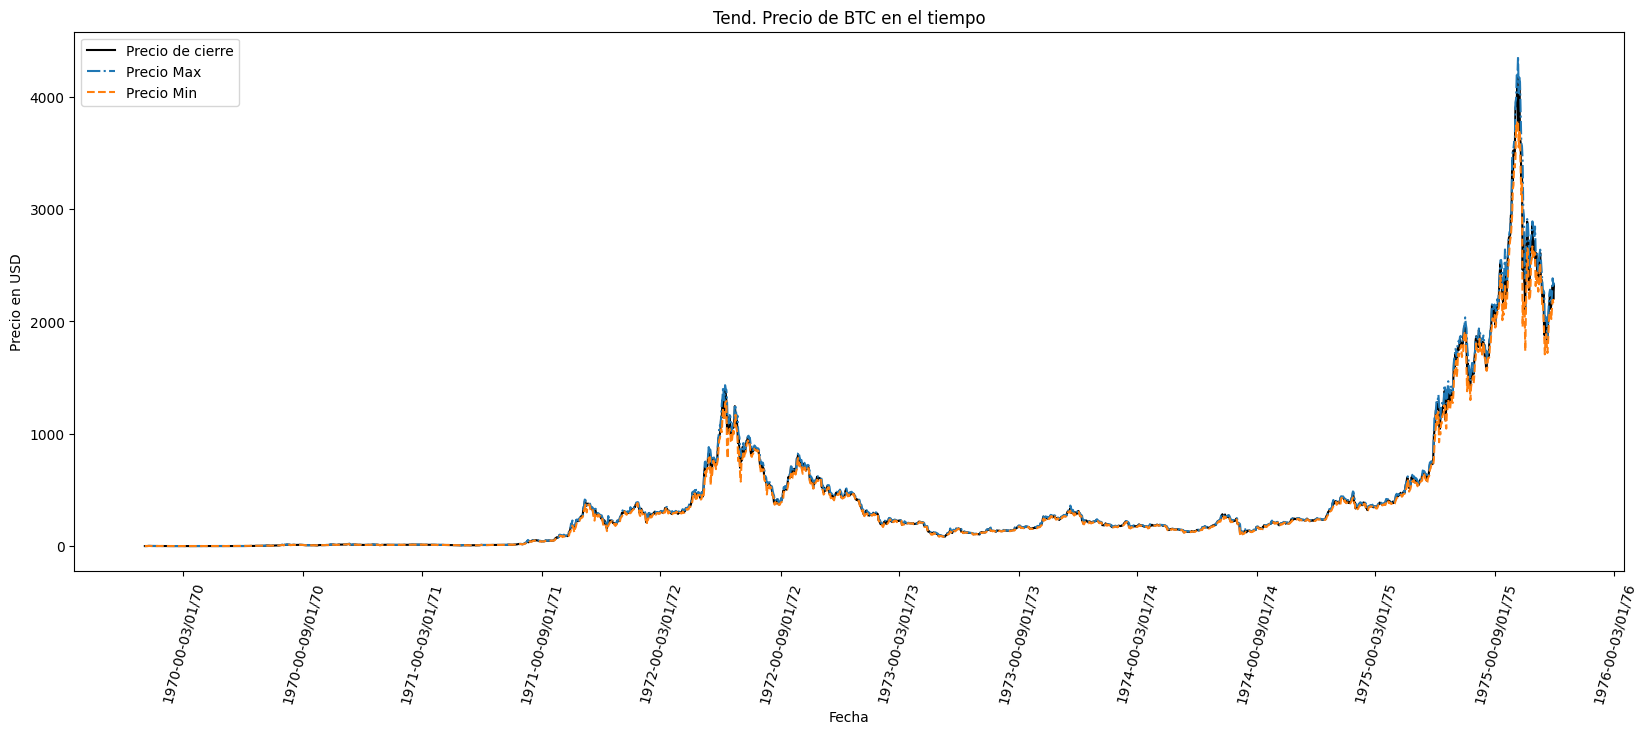

In [8]:
plt.figure(figsize=(20,7))
plt.plot (df_ethereum['Date'], df_ethereum ['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_ethereum ['Date'], df_ethereum['High'], label='Precio Max', linestyle='-.')
plt.plot(df_ethereum['Date'], df_ethereum['Low'], label='Precio Min', linestyle='--')
plt.title('Tend. Precio de BTC en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [9]:
df_ethereum['Date']= pd.to_datetime(df_ethereum['Date'])

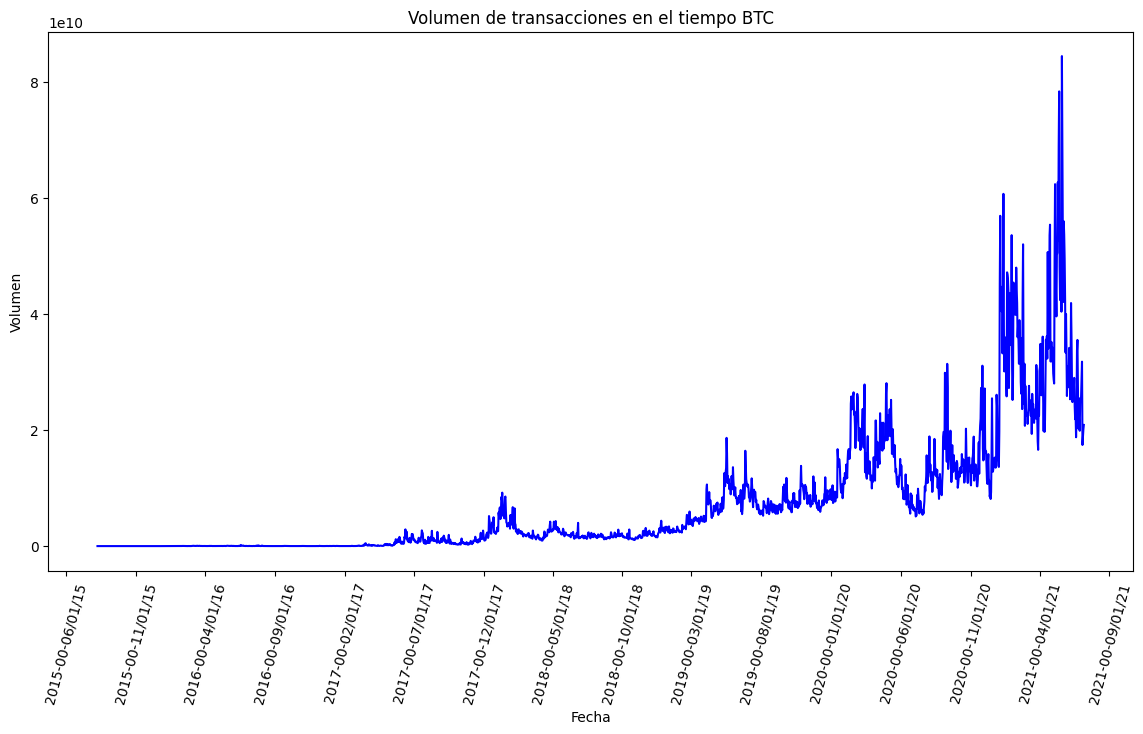

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df_ethereum['Date'], df_ethereum['Volume'], color='blue')
plt.title('Volumen de transacciones en el tiempo BTC')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [11]:
df_ethereum['Date']=pd.to_datetime(df_ethereum['Date'])

In [12]:
df_ethereum.set_index('Date',inplace=True)

In [13]:
ethereum_mensual = df_ethereum.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11712\1535661462.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ethereum_mensual = df_ethereum.resample('M').agg({


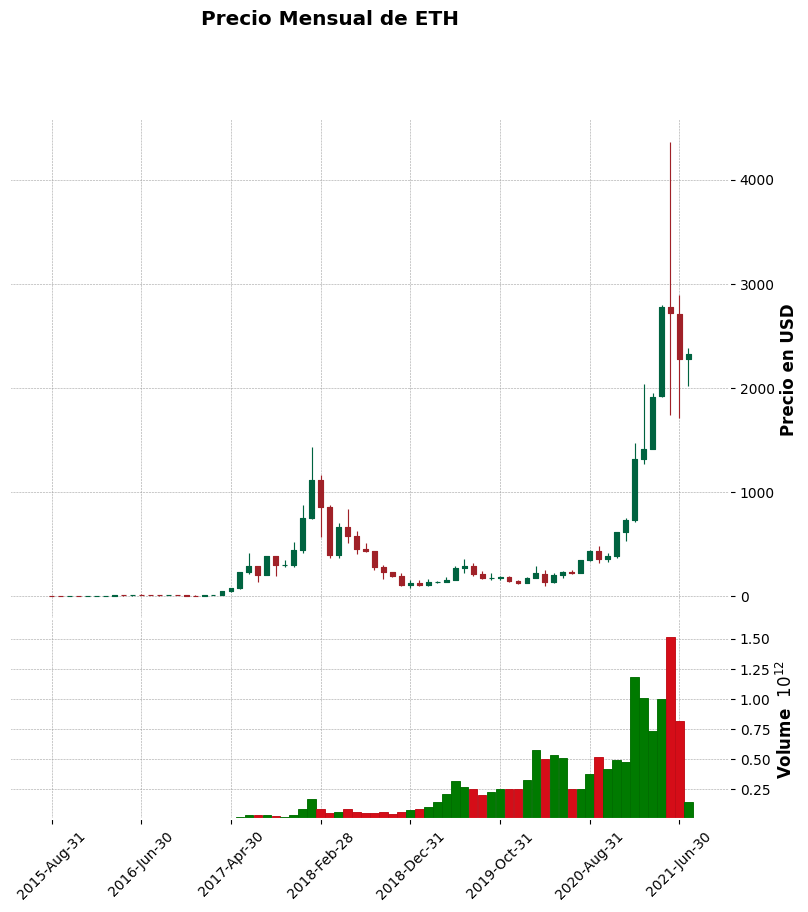

In [14]:
mpf.plot(ethereum_mensual, type='candle', style='charles',
         title='Precio Mensual de ETH',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))